In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from lets_plot import *
LetsPlot.setup_html()

In [2]:
ufc_df = pd.read_csv("../data/ufc_cleaned.csv")

In [3]:
(
    ggplot(ufc_df, aes(x='division', y='Wins', color='gender', size='Wins')) +
    geom_point(alpha=0.8,
               tooltips=layer_tooltips()
                   .line("Player: @Name")  
                   .line("Wins: @Wins")  
                   .line("Total Matches: @Total_Matches") 
                   .line("Height in inches: @Height_in_inches")
                   .line("Weight in pounds: @Weight_in_pounds")
                   .line("Division: @division")) +
    ggtitle("Wins by Division and Gender") +
    xlab("Division") + 
    ylab("Total Wins") +
    ggsize(1000,700)+
    scale_size(range=[2, 10]) +
    scale_color_manual(values=["#1f77b4", "#ff7f0e"]) +
    theme_light() +
    theme(
        axis_title=element_text(size=20),  # Adjust axis title size
        axis_text=element_text(size=12),   # Adjust overall axis text size
        axis_text_x=element_text(size=15, angle=35, hjust=1),  # Rotate and resize x-axis text
        axis_text_y=element_text(size=12)  # Resize y-axis text
    )
)

In [4]:
# Select a specific division (Change this to any division name)
selected_division = "Lightweight Division"  # Change this to any division you want

# Filter dataset for the chosen division
division_df = ufc_df[ufc_df['division'] == selected_division].sort_values(by='Lose').drop_duplicates('Name')

# Ensure that there are players in the dataset before plotting
if not division_df.empty:
    # Create the funnel chart
    plot = (
        ggplot(division_df, aes(x='Name', y='Lose', fill='Lose')) +
        geom_bar(stat="identity", alpha=0.8) +  # Funnel effect
        scale_fill_gradient(low="green", high="red") +  # Color gradient for effect
        coord_flip() +  # Flip for better readability
        ggtitle(f"Players with Least Losses in {selected_division}") +
        xlab("Player Name") +
        ylab("Number of Losses") +
        facet_wrap('division',ncol=2)+
        theme_minimal() +
        theme(
            axis_text_y=element_text(size=8),  # Smaller text for many players
            axis_text_x=element_text(size=10),
            axis_title=element_text(size=14)
        ) +
        ggsize(1200, 700)  # Adjust size
    )

    # Display the plot
    plot.show()
else:
    print(f"No data available for the division: {selected_division}")

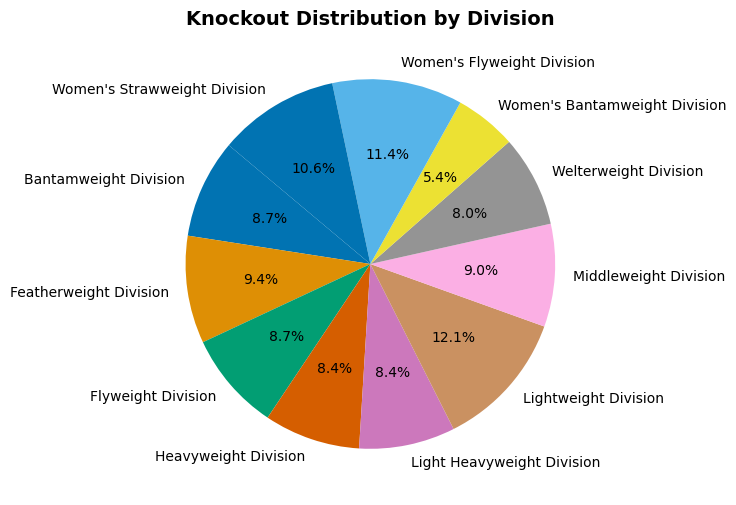

In [5]:
knockout_distribution = ufc_df.groupby('division')['Knock_out'].sum()



# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(
    knockout_distribution, 
    labels=knockout_distribution.index, 
    autopct='%1.1f%%', 
    startangle=140,
    colors=sns.color_palette("colorblind"), 
)

# Title
plt.title("Knockout Distribution by Division", fontsize=14, fontweight='bold')

# Display chart
plt.show()

In [6]:
ko_df = ufc_df.sort_values(by='Knock_out', ascending=False).drop_duplicates('Name').head(20)

plot = (
    ggplot(ko_df) +
    geom_bar(aes(x='Knock_out', y='Name', fill='Knock_out'), stat="identity") +
    coord_flip() +
    ggtitle("Top 20 Fighters by Knockouts") +
    xlab("Fighter Name") +
    ylab("Knockouts") +
    scale_fill_gradient(low="blue", high="red") +
    theme_minimal() +
    ggsize(1000, 600)+
    theme_minimal() +
    theme(
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank()
    ) 
)
plot.show()

In [7]:
plot = (
    ggplot(ufc_df) +
    geom_point(aes(x='Height_in_inches', y='Weight_in_pounds', color='gender', size='Wins'), alpha=0.8,
               tooltips=layer_tooltips()
                   .line("Player: @Name")  
                   .line("Wins: @Wins")  
                   .line("Total Matches: @Total_Matches") 
                   .line("Height in inches: @Height_in_inches")
                   .line("Weight in pounds: @Weight_in_pounds")
                   .line("Division: @division")) +
    ggtitle("Height vs. Weight of Fighters") +
    scale_color_manual(values=["#9933ff", "#ff9900"]) +
    xlab("Height (inches)") +
    ylab("Weight (pounds)") +
    theme_light() +
    ggsize(900, 600)
)
plot.show()

In [8]:
plot = (
    ggplot(ufc_df) +
    geom_histogram(aes(x='Age', fill='gender'), bins=10, alpha=0.8, position="dodge") +
    ggtitle("Number of players Across Age Groups") +
    scale_fill_manual(values=["#7300e6", "#ff9900"])+
    xlab("Age") +
    ylab("Number of Fighters") +
    theme_minimal() +
    ggsize(1000, 600)+
    theme(panel_grid_major=element_blank(),panel_grid_minor=element_blank())
)
plot.show()

In [9]:

# Select the top 50 fighters with the least losses
top_50_fighters = ufc_df.nsmallest(50, 'Lose').drop_duplicates('Name')

# Create the donut chart using Plotly
fig = px.pie(
    top_50_fighters,
    values='Lose',  # Size of slices based on losses
    names='Name',  # Fighter names
    hole=0.4,  # Donut effect
    title="Top 50 Fighters with the Least Losses",
    color_discrete_sequence=px.colors.sequential.Plasma[::-1],  # Use a valid color sequence
)

fig.update_traces(
    textinfo='label',  # ✅ Show player names and percentages on the chart
    textfont_size=10,  # Adjust text size for better readability
    textposition='inside',
    hoverinfo='label+percent+value',  # Show name, percentage, and value on hover
    hovertemplate="<b>%{label}</b><br>Losses: %{value}"  # Format hover text
)

fig.update_layout(
    height=600,  # Increased figure height
    width=800,  # Increased figure width
    showlegend=True
)


# ✅ Fix: Open in browser instead of Jupyter
fig.show()

In [10]:
# Filter out rows with missing country data
fighters_by_country = ufc_df.dropna(subset=['country_name'])

# Create scatter plot
fig = px.scatter(
    fighters_by_country,
    x='Wins',  # Total Wins
    y='Knock_out',  # Total Knockouts
    color='country_name',  # Color by country
    size='Win_streak',  # Fighters with longer win streaks appear larger
    hover_name='Name',  # Show fighter names on hover
    title="UFC Fighters: Wins vs. Knockouts by Country",
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use a distinct color set
)

# Customize layout
fig.update_layout(
    height=700,
    width=1000,
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False),
    xaxis_title="Total Wins",
    yaxis_title="Total Knockouts",
    showlegend=True
)

# Show plot
fig.show()


In [11]:
# Select relevant columns and top 50 fighters with the least losses
top_50_fighters = ufc_df.sort_values(by='Wins', ascending=False).drop_duplicates('Name')

# Create an interactive scatter plot
fig = px.scatter(
    top_50_fighters,
    x='Submission',  # X-axis: Total Submissions
    y='Striking_accuracy',  # Y-axis: Striking Accuracy
    size='Win_streak',  # Bubble size represents Win Streak
    color='country_name',  # Color by country
    hover_name='Name',  # Show fighter names
    hover_data={  # Show additional details on hover
        'Submission': True,
        'Wins': True,
        'Knock_out': True,
        'Win_streak': True,
        'Striking_accuracy': True,
        'country_name': False,  # Don't repeat the country name
    },
    title="Striking accuracy vs. Submissions ",
    color_discrete_sequence=px.colors.qualitative.Dark24,  # Use a colorful set
)

# Increase figure size for better visibility
fig.update_layout(
    width=900,  # Increase width
    height=600,  # Increase height
    xaxis_title="Total Submission",
    yaxis_title="Striking accuracy",
    hovermode="closest",
    xaxis=dict(showgrid=False), 
    yaxis=dict(showgrid=False),
    template="plotly_dark",  # Dark theme
)

fig.show()

In [12]:
import pandas as pd
import plotly.express as px

# Convert Debut to datetime and extract Year
ufc_df['Year'] = pd.to_datetime(ufc_df['Debut'], errors='coerce').dt.year

# Fill missing Year values with the earliest available year
ufc_df['Year'] = ufc_df['Year'].fillna(ufc_df['Year'].min()).astype(int)

# Drop missing country names
ufc_df= ufc_df.dropna(subset=['country_name'])

# Group by Year and Country, count all fighters (including duplicates)
country_trends = (
    ufc_df.groupby(['Year', 'country_name'])['Name'].count()
    .reset_index(name='Fighter Count')
)

# ✅ Ensure ALL countries appear in EVERY year, even with 0 fighters
all_years = list(range(ufc_df['Year'].min(), ufc_df['Year'].max() + 1))
all_countries = sorted(ufc_df['country_name'].unique())

full_index = pd.MultiIndex.from_product([all_years, all_countries], names=['Year', 'country_name'])
country_trends = (
    pd.DataFrame(index=full_index)
    .reset_index()
    .merge(country_trends, on=['Year', 'country_name'], how='left')
    .fillna({'Fighter Count': 0})
)

# Convert Fighter Count to integer
country_trends['Fighter Count'] = country_trends['Fighter Count'].astype(int)

# ✅ Ensure all countries are on the x-axis
country_trends['country_name'] = pd.Categorical(
    country_trends['country_name'], categories=all_countries, ordered=True
)

# Get maximum count for y-axis
max_fighters = country_trends["Fighter Count"].max()

# ✅ Create animated bar chart
fig = px.bar(
    country_trends,
    x="country_name",
    y="Fighter Count",
    color="country_name",
    animation_frame="Year",
    title="Number of UFC Fighters by Country Over Time",
    labels={"country_name": "Country", "Fighter Count": "Number of Fighters"},
    color_discrete_sequence=px.colors.qualitative.Bold
)

# ✅ Fix x-axis to keep all countries visible
fig.update_layout(
    xaxis=dict(
        categoryorder='array',
        categoryarray=all_countries,  # Ensures all countries appear
        tickmode='array',
        tickvals=list(range(len(all_countries))),
    ),
    yaxis=dict(range=[0, max_fighters + 5]),  # Fixed y-axis range
    yaxis_title="Number of Fighters",
    xaxis_title="Country",
    template="plotly_dark",
    width=1000,
    height=600
)

fig.show()
